In [51]:
# importing python libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import zscore
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [52]:
# Importing the data

train_data = pd.read_csv('./train.csv') # Train Data

test_data = pd.read_csv('./test.csv') # Test Data

val_data = pd.read_csv('./validation.csv') # Validation data for deep learning 


In [53]:
# Concatenate the three dataset temporarily to perform the exploration and cleaning on just one dataset

data = pd.concat([train_data, test_data, val_data], keys=['train_data_key', 'test_data_key', 'val_data_key']) # Create keys for each data in order to retrieve them after processing the data 

In [4]:
data.head()

Age  Grade  Gender         Race  SES_Quartile  \
train_data_key 0   17     12  Female        White             3   
               1   18     12  Female        White             2   
               2   16     11  Female        White             2   
               3   14      9  Female        White             4   
               4   16     11  Female  Two-or-more             4   

                 ParentalEducation SchoolType    Locale  TestScore_Math  \
train_data_key 0                HS     Public  Suburban       70.258235   
               1                HS     Public  Suburban       67.876546   
               2                HS     Public      City       62.070623   
               3        Bachelors+     Public      Town       79.909312   
               4       SomeCollege     Public     Rural       90.562294   

                  TestScore_Reading  ...       GPA  AttendanceRate  \
train_data_key 0          79.665185  ...  2.743879        0.906809   
               1          59.611505  ...  2.587700        0.843739   
               2          70.577443  ...  2.426294        0.850923   
               3          82.924450  ...  3.558240        0.946786   
               4          95.352336  ...  3.896884        0.988036   

                  StudyHours  InternetAccess  Extracurricular  PartTimeJob  \
train_data_key 0    1.089243               1                1            0   
               1    0.879911               1                1            0   
               2    1.003442               1                1            0   
               3    1.814810               1                1            0   
               4    1.157241               1                1            0   

                  ParentSupport  Romantic  FreeTime  GoOut  
train_data_key 0              0         0         2      2  
               1              1         0         5      2  
               2              1         1         5      1  
               3              1         0         4      2  
               4              0         0         3      4  

[5 rows x 21 columns]

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10000000 entries, ('train_data_key', np.int64(0)) to ('val_data_key', np.int64(999228))
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Age                int64  
 1   Grade              int64  
 2   Gender             object 
 3   Race               object 
 4   SES_Quartile       int64  
 5   ParentalEducation  object 
 6   SchoolType         object 
 7   Locale             object 
 8   TestScore_Math     float64
 9   TestScore_Reading  float64
 10  TestScore_Science  float64
 11  GPA                float64
 12  AttendanceRate     float64
 13  StudyHours         float64
 14  InternetAccess     int64  
 15  Extracurricular    int64  
 16  PartTimeJob        int64  
 17  ParentSupport      int64  
 18  Romantic           int64  
 19  FreeTime           int64  
 20  GoOut              int64  
dtypes: float64(6), int64(10), object(5)
memory usage: 1.9+ GB


In [86]:
# Data description
data.describe()

,Age,Grade,SES_Quartile,TestScore_Math,TestScore_Reading,TestScore_Science,GPA,AttendanceRate,StudyHours,InternetAccess,Extracurricular,PartTimeJob,ParentSupport,Romantic,FreeTime,GoOut
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,1.599965e+01,1.079983e+01,2.499800e+00,7.497538e+01,7.497966e+01,7.497925e+01,2.996769e+00,8.995845e-01,9.998080e-01,8.498729e-01,5.499800e-01,1.799653e-01,4.232366e-01,1.998626e-01,3.000392e+00,2.072623e+00
std,1.413856e+00,1.165948e+00,1.118122e+00,9.945743e+00,9.944393e+00,9.948699e+00,4.595502e-01,4.805824e-02,3.481654e-01,3.571960e-01,4.974958e-01,3.841586e-01,4.940723e-01,3.998969e-01,1.008841e+00,9.183918e-01
min,1.400000e+01,9.000000e+00,1.000000e+00,2.257681e+01,2.118797e+01,1.918883e+01,7.131814e-01,7.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.500000e+01,1.000000e+01,1.000000e+00,6.824556e+01,6.825318e+01,6.825599e+01,2.685058e+00,8.669499e-01,7.642423e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00
50%,1.600000e+01,1.100000e+01,2.000000e+00,7.499616e+01,7.500062e+01,7.500084e+01,2.999878e+00,8.999669e-01,9.999166e-01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.000000e+00
75%,1.700000e+01,1.200000e+01,3.000000e+00,8.174271e+01,8.174398e+01,8.174257e+01,3.314462e+00,9.330282e-01,1.235308e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.000000e+00,3.000000e+00
max,1.800000e+01,1.200000e+01,4.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,4.000000e+00,1.000000e+00,2.801384e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00


In [31]:
# Checking for missing values 

print(data.isnull().sum())


Age                  0
Grade                0
Gender               0
Race                 0
SES_Quartile         0
ParentalEducation    0
SchoolType           0
Locale               0
TestScore_Math       0
TestScore_Reading    0
TestScore_Science    0
GPA                  0
AttendanceRate       0
StudyHours           0
InternetAccess       0
Extracurricular      0
PartTimeJob          0
ParentSupport        0
Romantic             0
FreeTime             0
GoOut                0
dtype: int64


### There is no missing values 

In [87]:
# Checking for duplicate

print('Total duplicate rows: ', data.duplicated().sum())


Total duplicate rows:  0


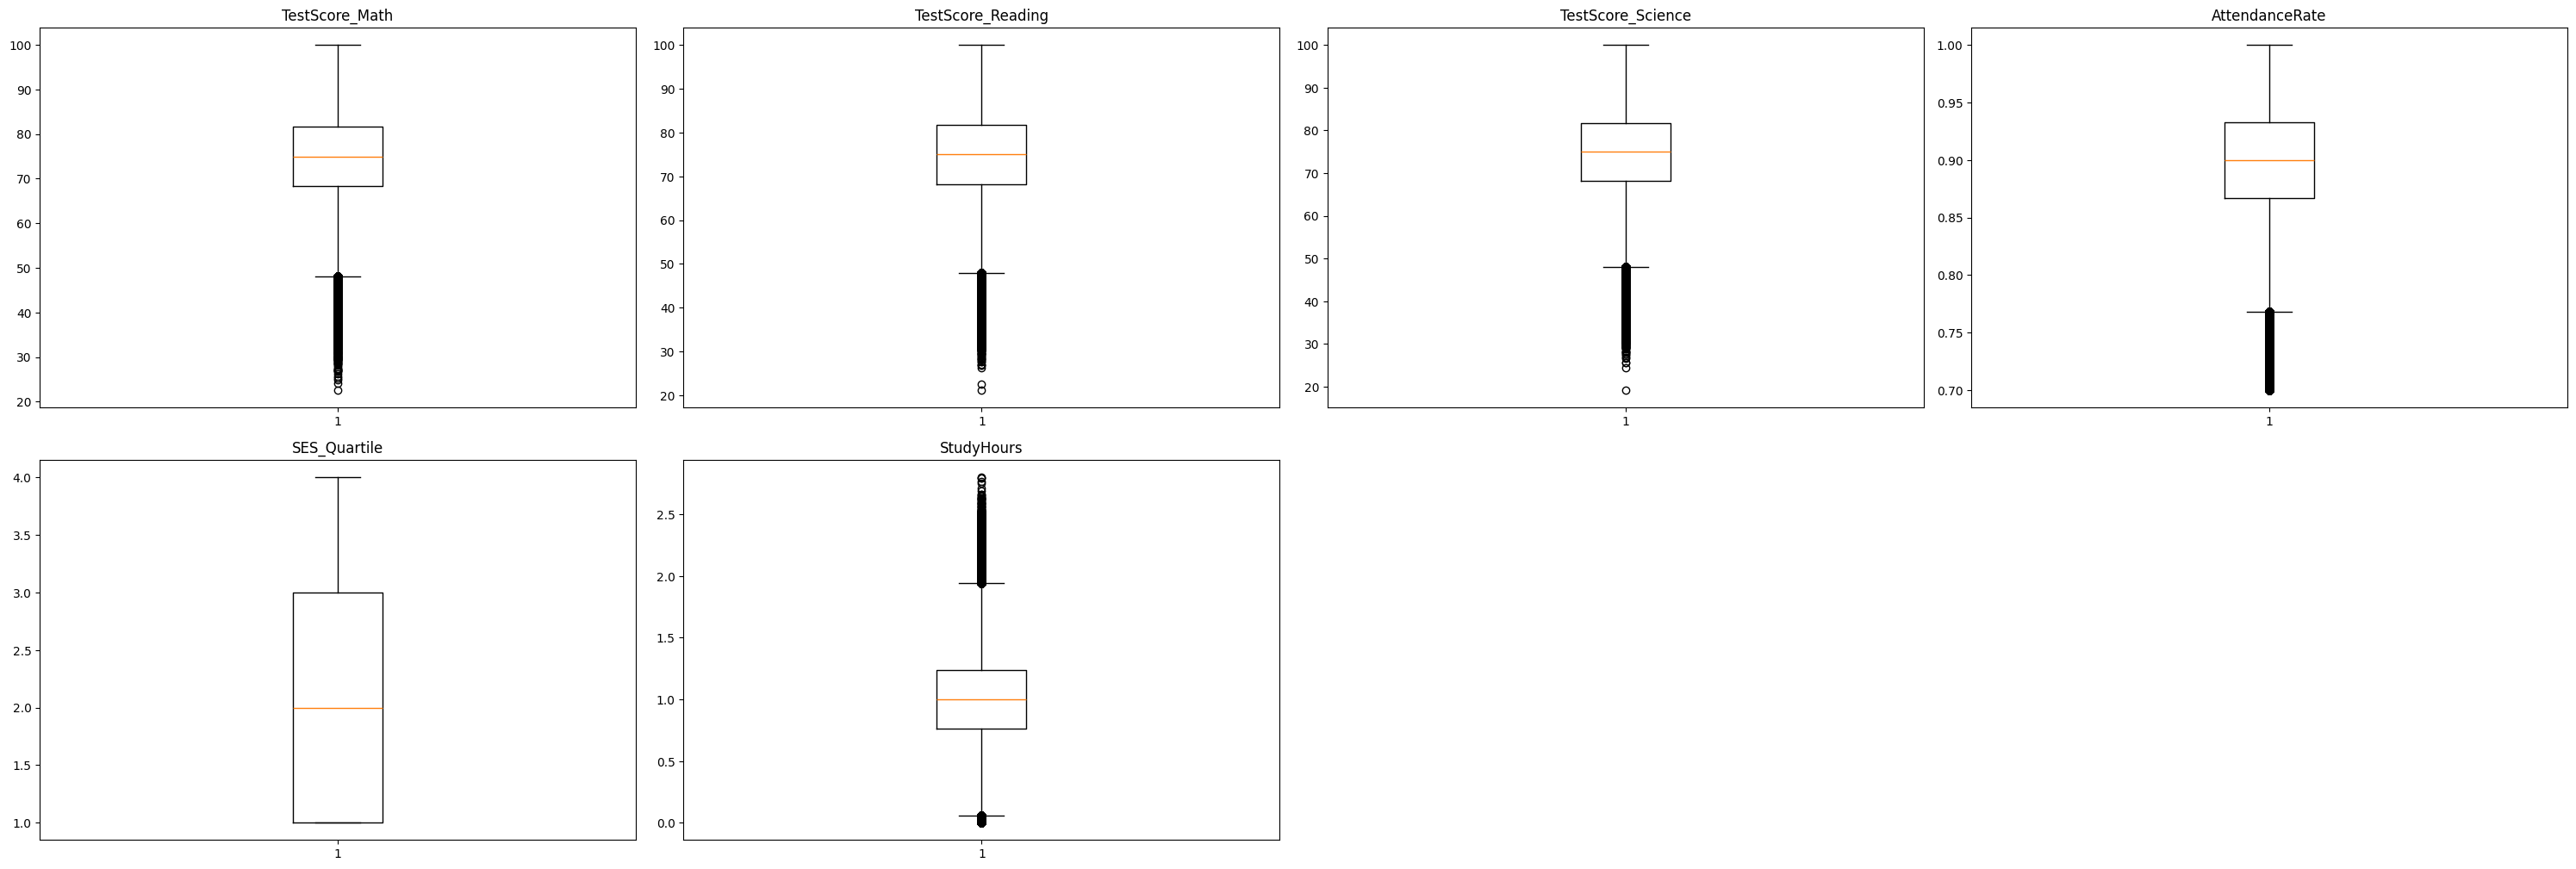

In [54]:
# Checking for outliers in continues numerical columns 

num_col_cont=['TestScore_Math', 'TestScore_Reading','TestScore_Science','AttendanceRate', 'SES_Quartile','StudyHours' ]

plt.rcParams['figure.figsize'] = (30, 20)

for i, col  in enumerate(num_col_cont, 1):
    plt.subplot(4, 4, i)
    plt.boxplot(data[col]) 
    plt.title(col)
    
plt.tight_layout()
plt.show()


In [89]:
# Checking for outliers with zscore

for col in num_col_cont:
    z_scores = zscore(data[col])  
    outliers = data[(np.abs(z_scores) >= 3)]  # Threshold = 3
    print(f"{col}: {len(outliers)} outliers (Z-score > 3)")

TestScore_Math: 14020 outliers (Z-score > 3)
TestScore_Reading: 14267 outliers (Z-score > 3)
TestScore_Science: 14287 outliers (Z-score > 3)
AttendanceRate: 16035 outliers (Z-score > 3)
SES_Quartile: 0 outliers (Z-score > 3)
StudyHours: 13141 outliers (Z-score > 3)


In [55]:
# Removing outliers 

z_scores = np.abs(zscore(data[num_col_cont]))

cleaned_data = data[(z_scores < 3).all(axis=1)] # the new cleaned data

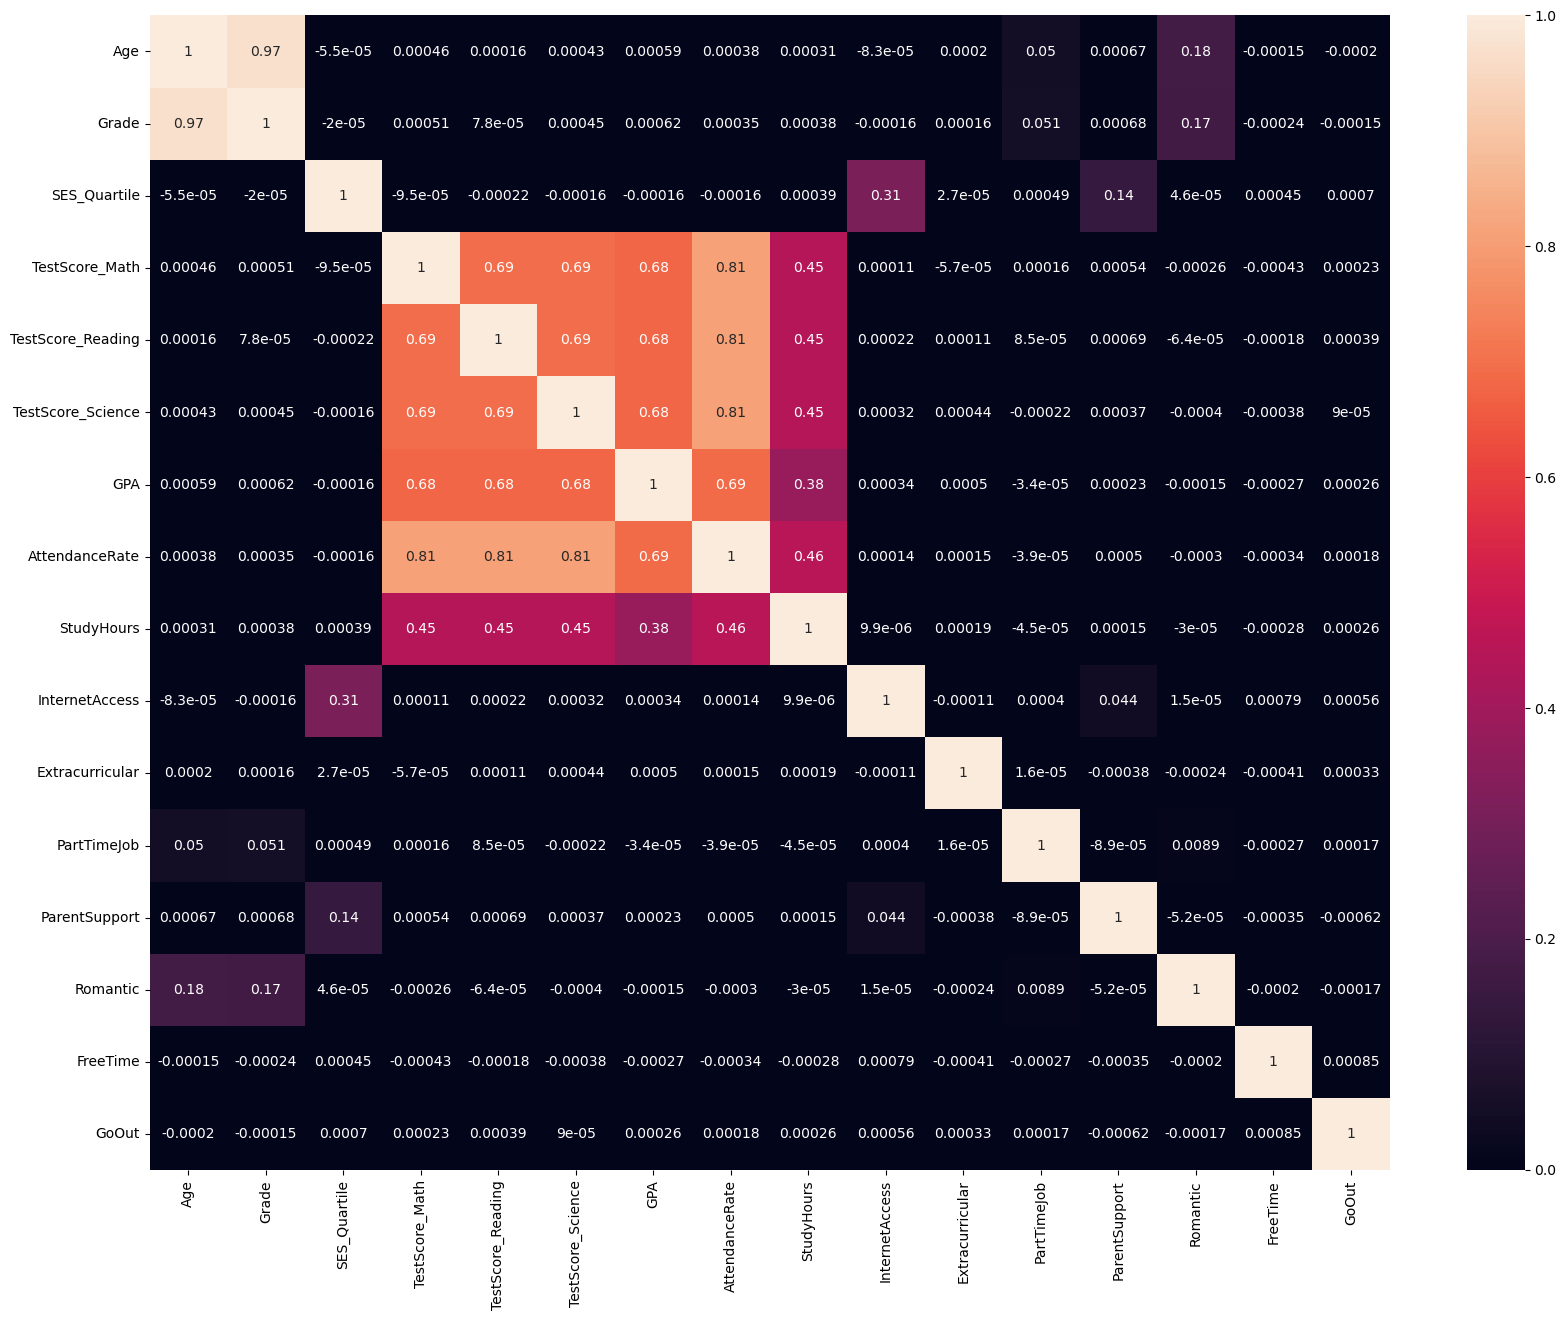

In [92]:
# Heatmap 

plt.figure(figsize=(20,15))

sns.heatmap(cleaned_data.select_dtypes(exclude='object').corr(), annot=True)

plt.show()

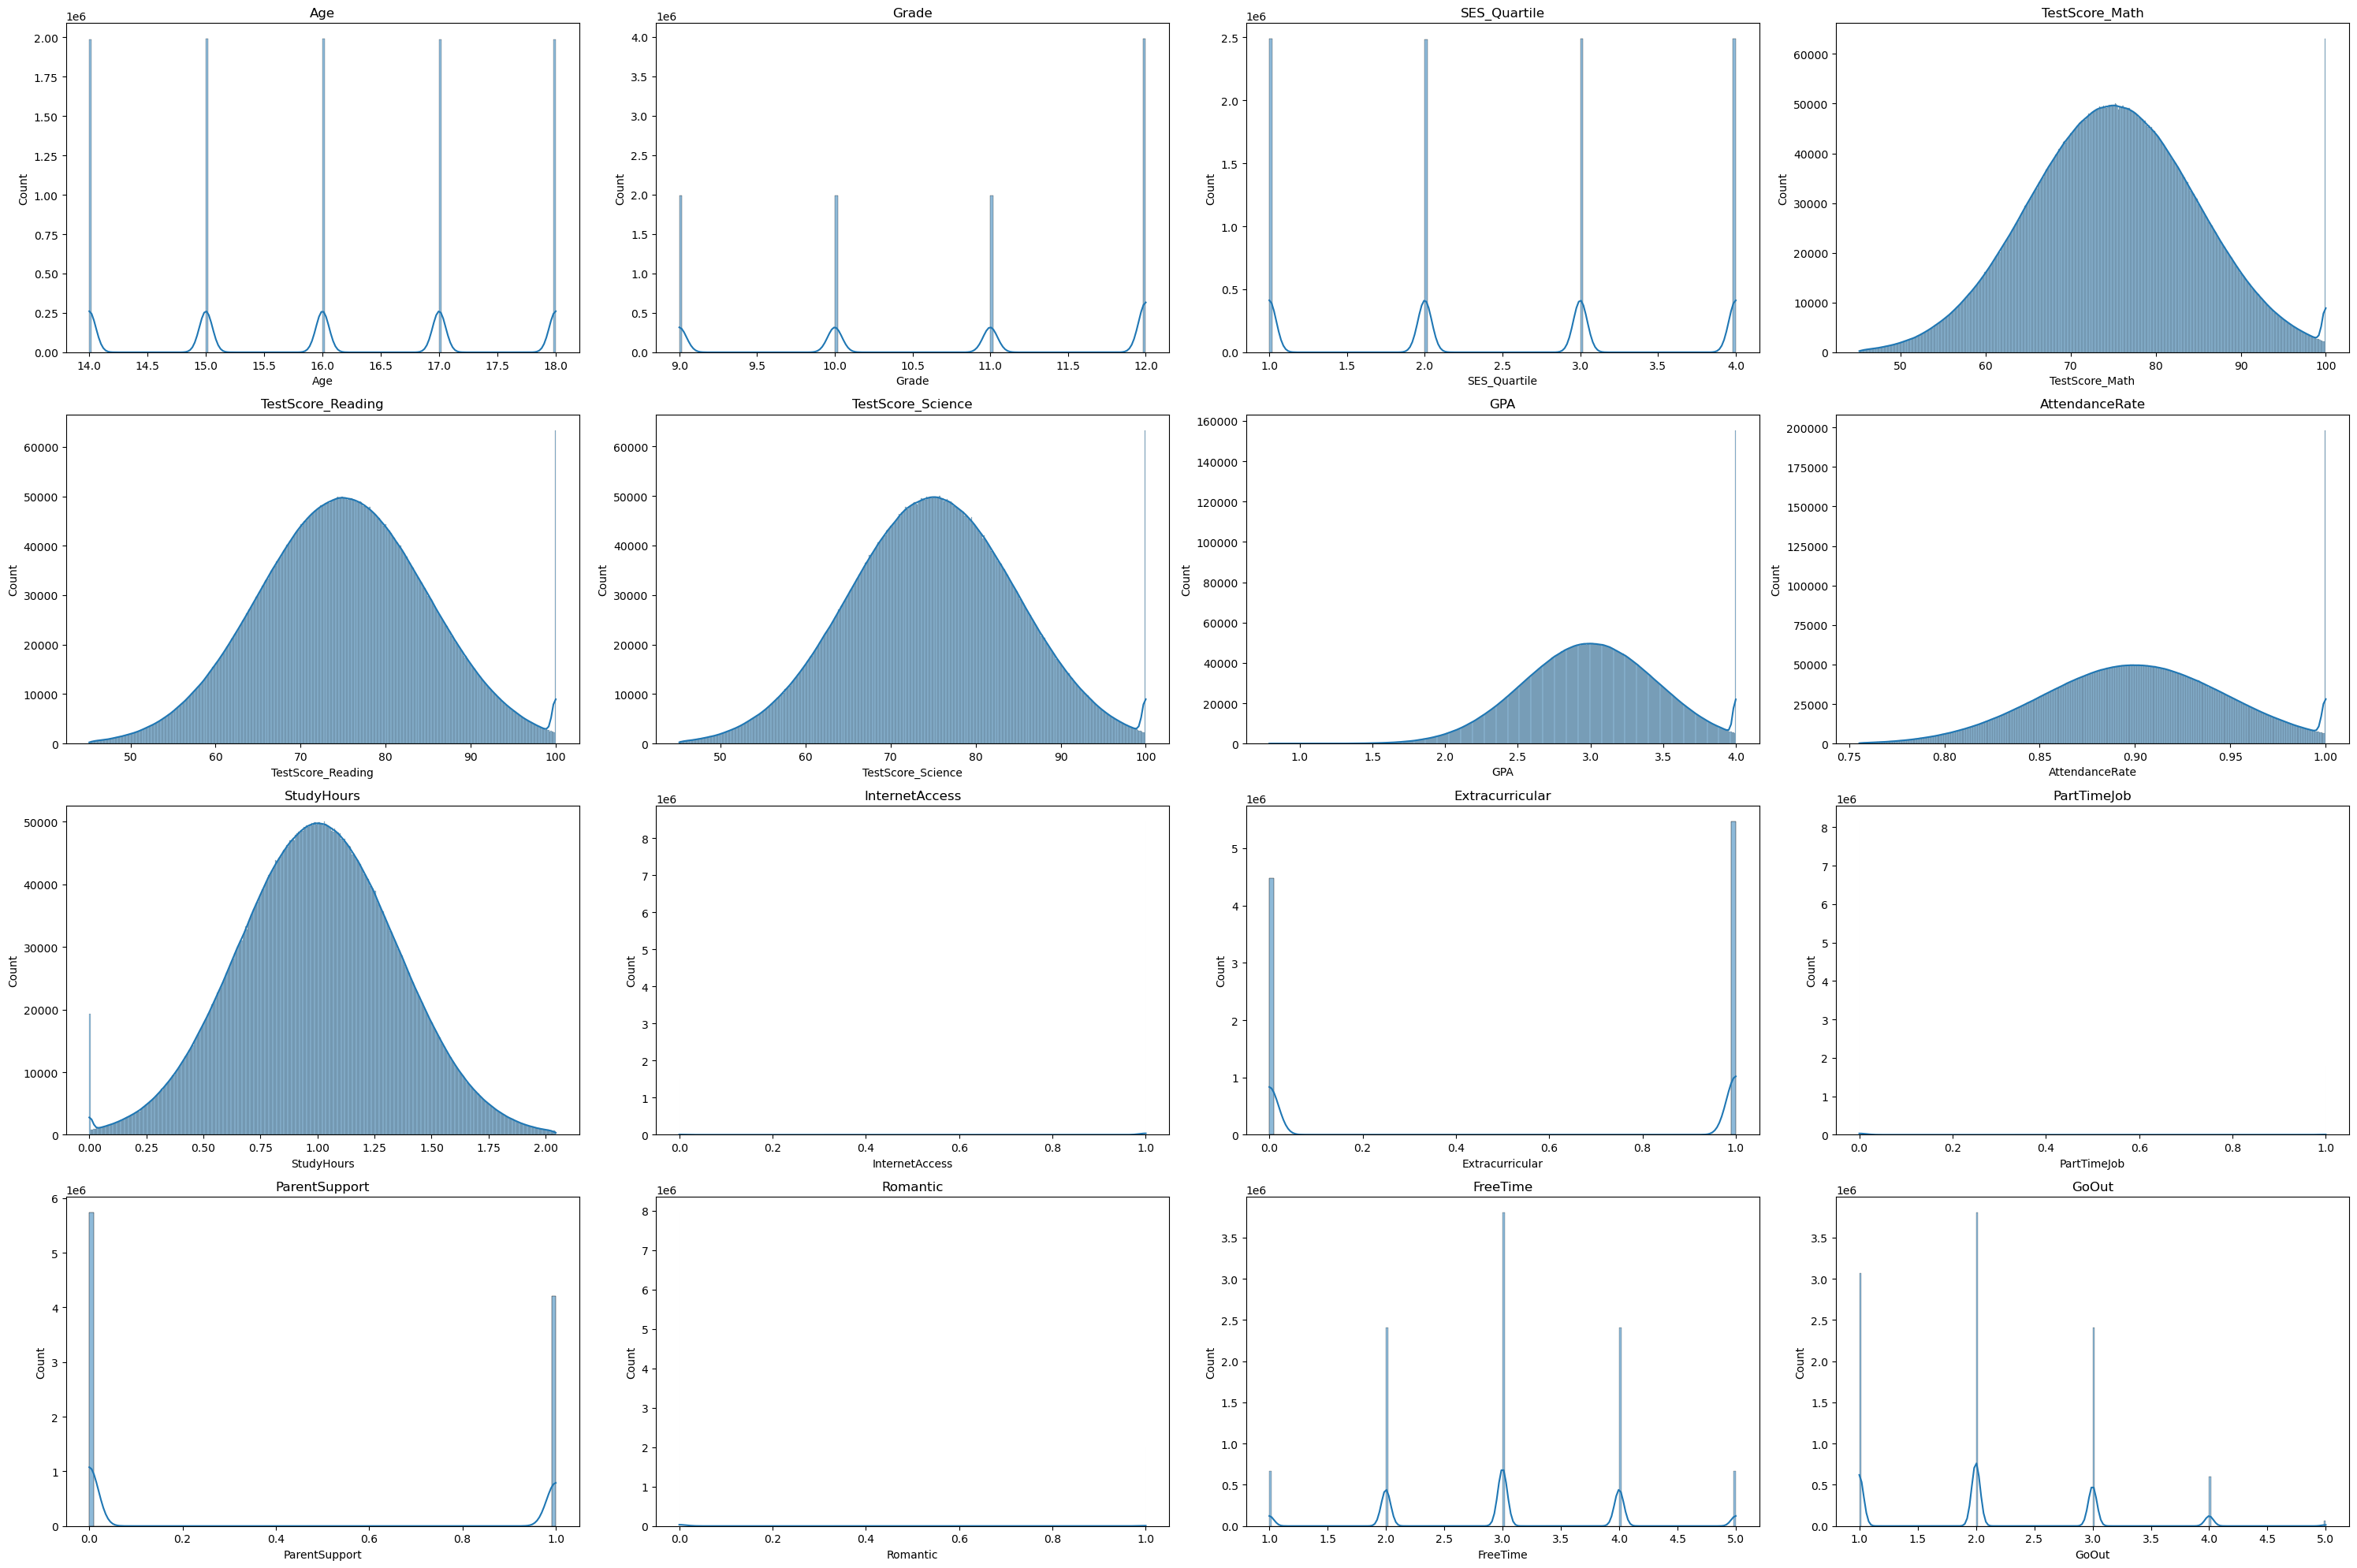

In [93]:
# Check the distribution of the numerical variable in the training dataset

plt.rcParams['figure.figsize'] = (30, 20)

num_col = cleaned_data.select_dtypes(exclude='object').columns

for i, col  in enumerate(num_col, 1):
    plt.subplot(4, 4, i)
    sns.histplot(cleaned_data[col], kde=True) 
    plt.title(col)
    
plt.tight_layout()
plt.show()

In [94]:
# Check Categorical Variables

cat_col = cleaned_data.select_dtypes(include='object').columns    # Categorical columns 

for col in cat_col:
    print(col," ", cleaned_data[col].unique())

Gender   ['Female' 'Male']
Race   ['White' 'Two-or-more' 'Hispanic' 'Black' 'Asian' 'Other']
ParentalEducation   ['HS' 'Bachelors+' 'SomeCollege' '<HS']
SchoolType   ['Public' 'Private']
Locale   ['Suburban' 'City' 'Town' 'Rural']


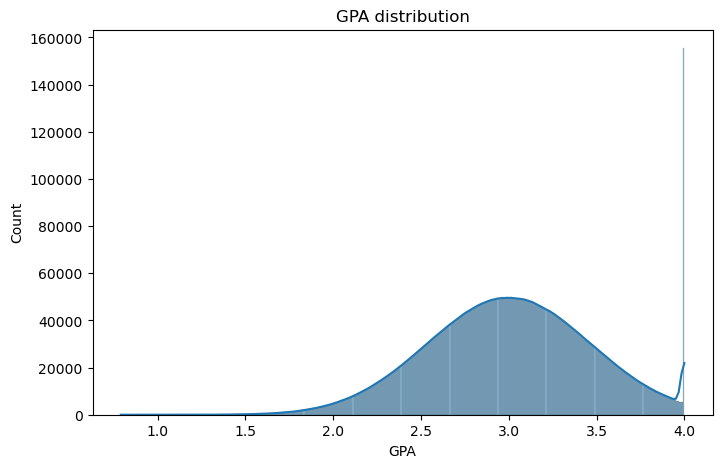

In [95]:
# Target variable (GPA) distribution 

plt.figure(figsize=(8,5))
sns.histplot(cleaned_data['GPA'], kde=True) 
plt.title('GPA distribution')
plt.show()

## **Exploratory Data Analysis**

In [ ]:
# We will divide the gpa variable into 5 categories to have better insights and visualization on data


cleaned_data_copy = cleaned_data.copy() # Since we will be making some changes to the target column, we will be making these changes to the copied data, not the original data.

condition = [
    (cleaned_data_copy['GPA']> 3.5),
    (cleaned_data_copy['GPA']> 3),
    (cleaned_data_copy['GPA']> 2.5),
    (cleaned_data_copy['GPA']> 2),
    (cleaned_data_copy['GPA']> 0)
]

choices = [4, 3, 2, 1, 0] 

choices_cat = { 4 : 'Excellent', 3 : 'Very good', 2: 'Good', 1 : 'Average', 0 : 'Under_Average'}

cleaned_data_copy['GPA'] = np.select(condition, choices , default=1) # Update the GPA feature in the copied dataset with the mapped values

cleaned_data_copy['GPA_cat'] = cleaned_data_copy['GPA'].map(choices_cat) # Create a new column GPA_cat that mirrors the GPA values but uses descriptive categorical labels instead of numerical values, to enhance data visualization



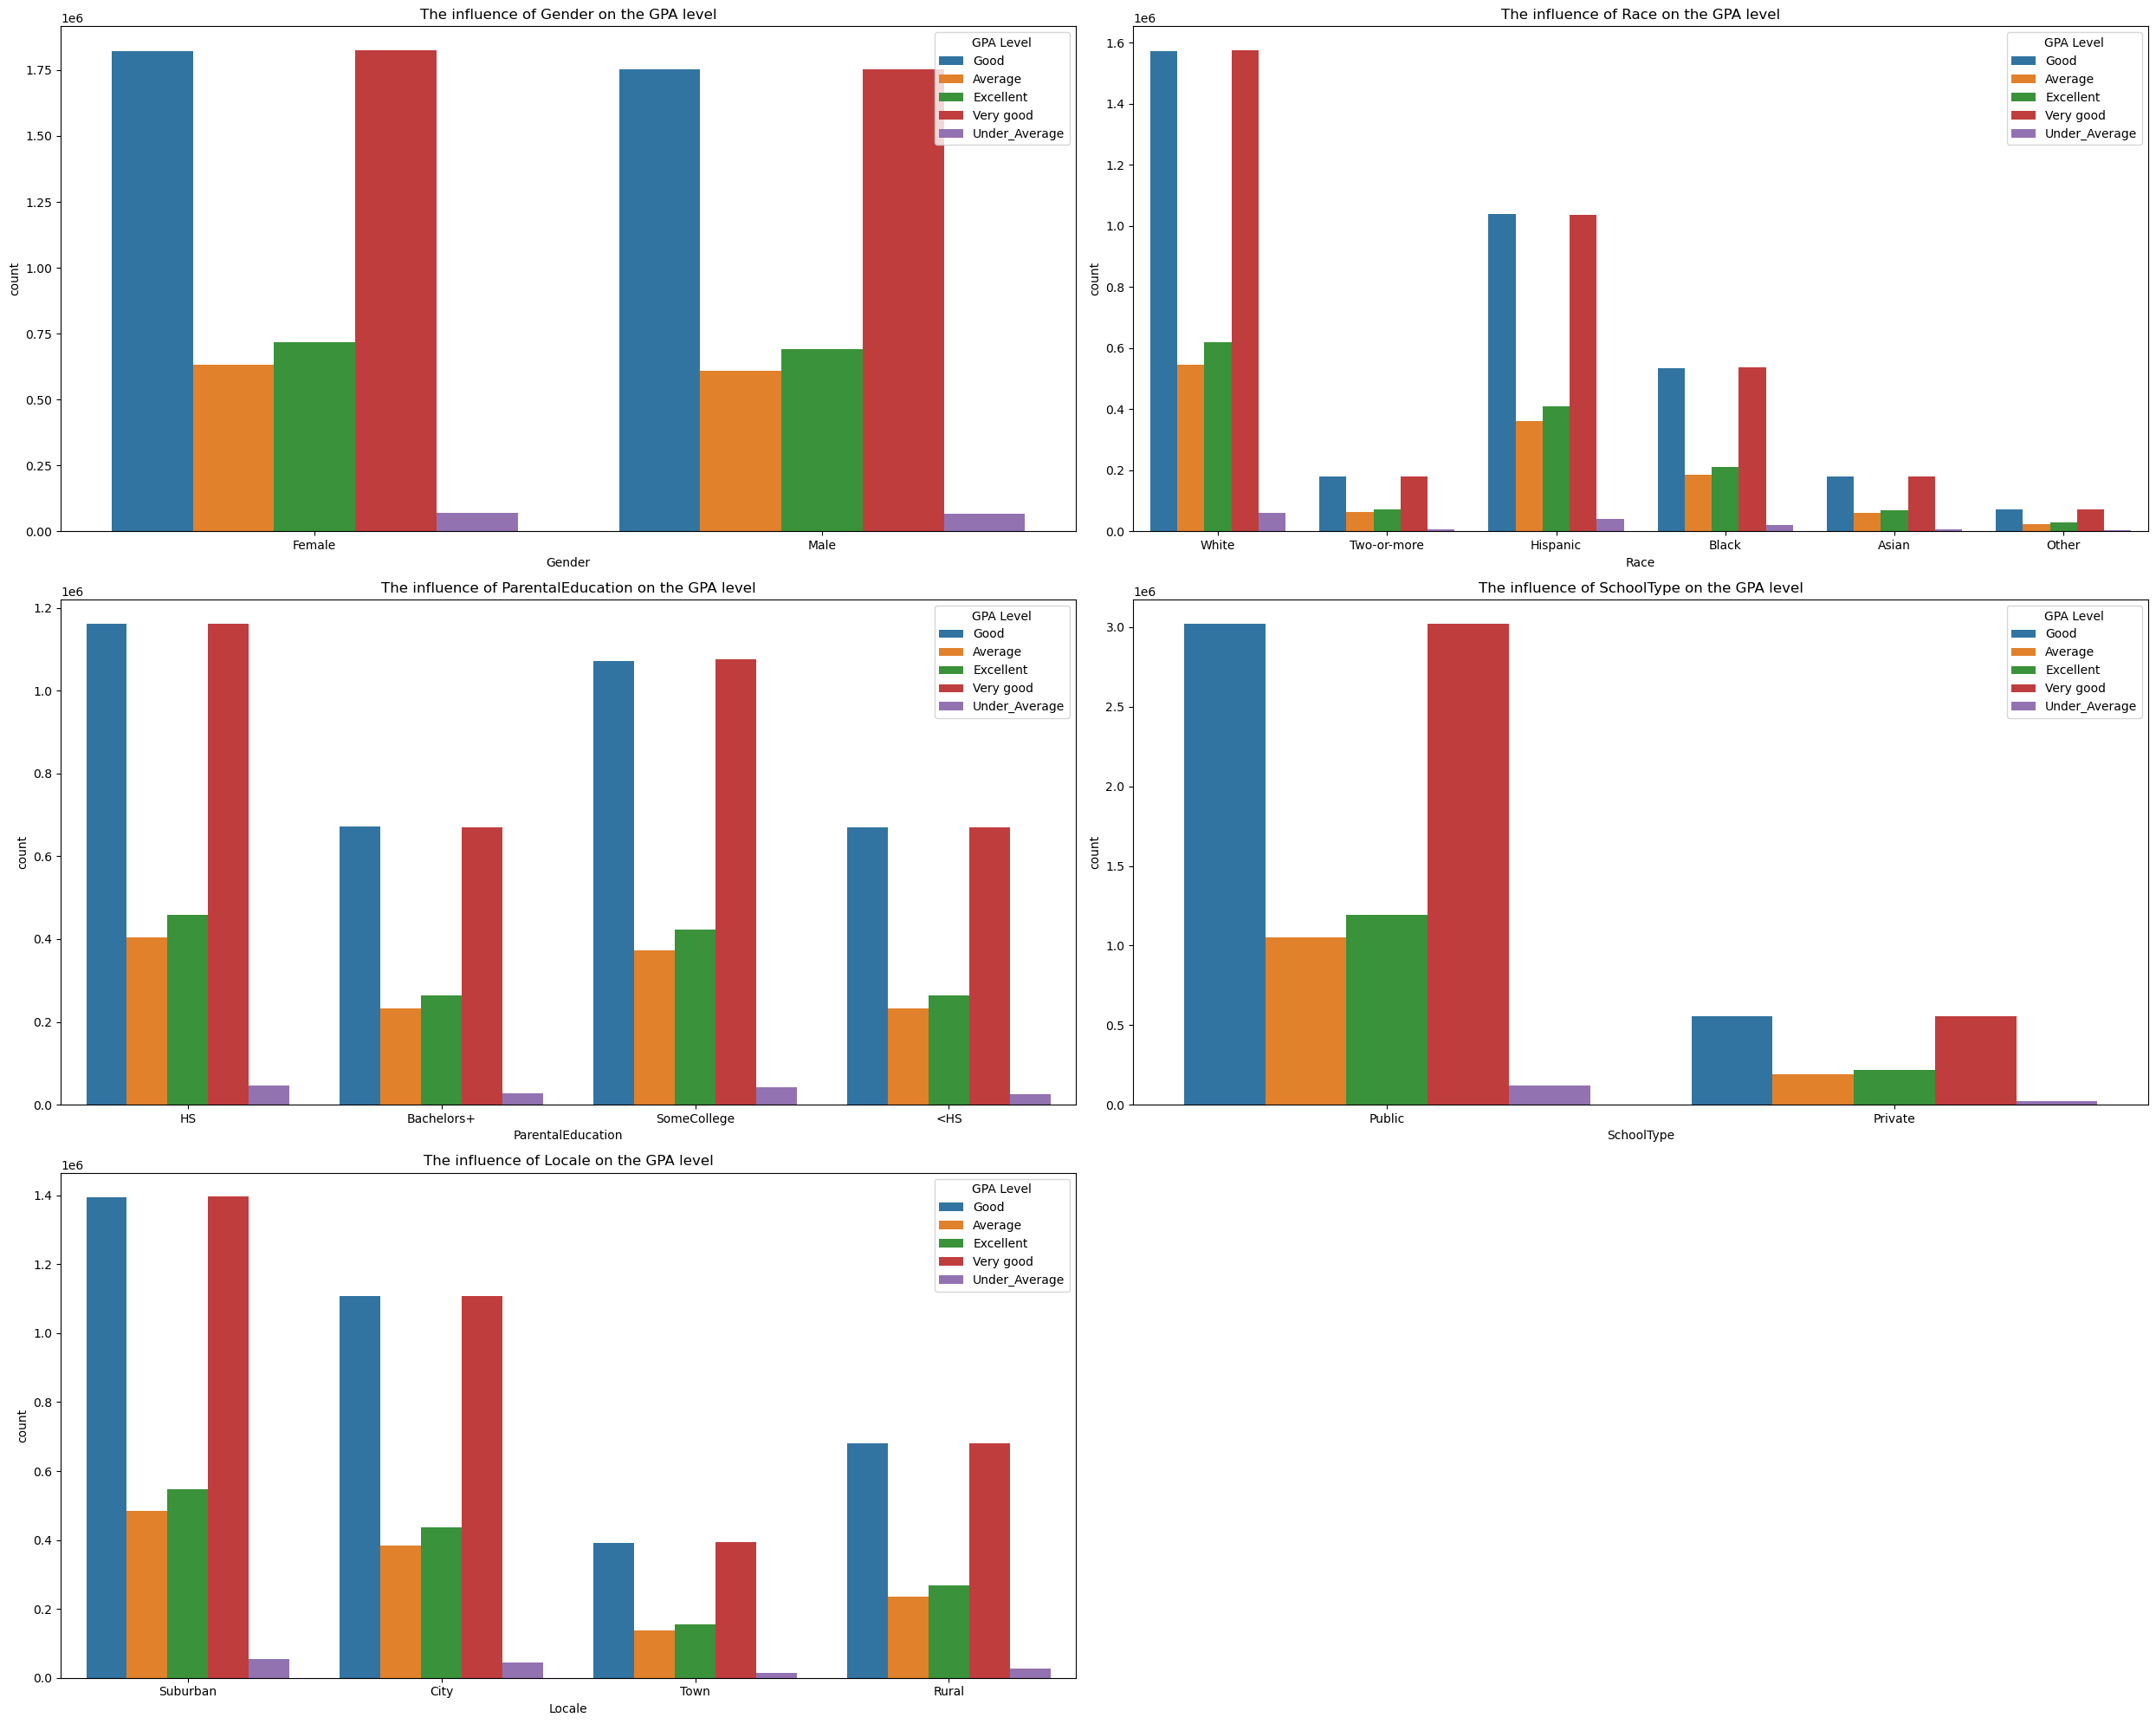

In [ ]:
# Visualization of the categorical values on GPA level (as categorical )

plt.rcParams['figure.figsize'] = (25,20)

for i, col in enumerate(cat_col, 1):
    
    plt.subplot(3,2,i)
    sns.countplot(x=col, hue='GPA_cat', data = cleaned_data_copy, palette = "tab10")
    plt.legend(loc='upper right', title='GPA Level')
    plt.title(f'The influence of {col} on the GPA level')

plt.tight_layout()
plt.show()

### Based on the above visualizations, gender does not appear to have a significant influence on students' GPA. On an other hand, the factors such as parental education background, type of school, locality, and race seem to have a notable impact on academic performance

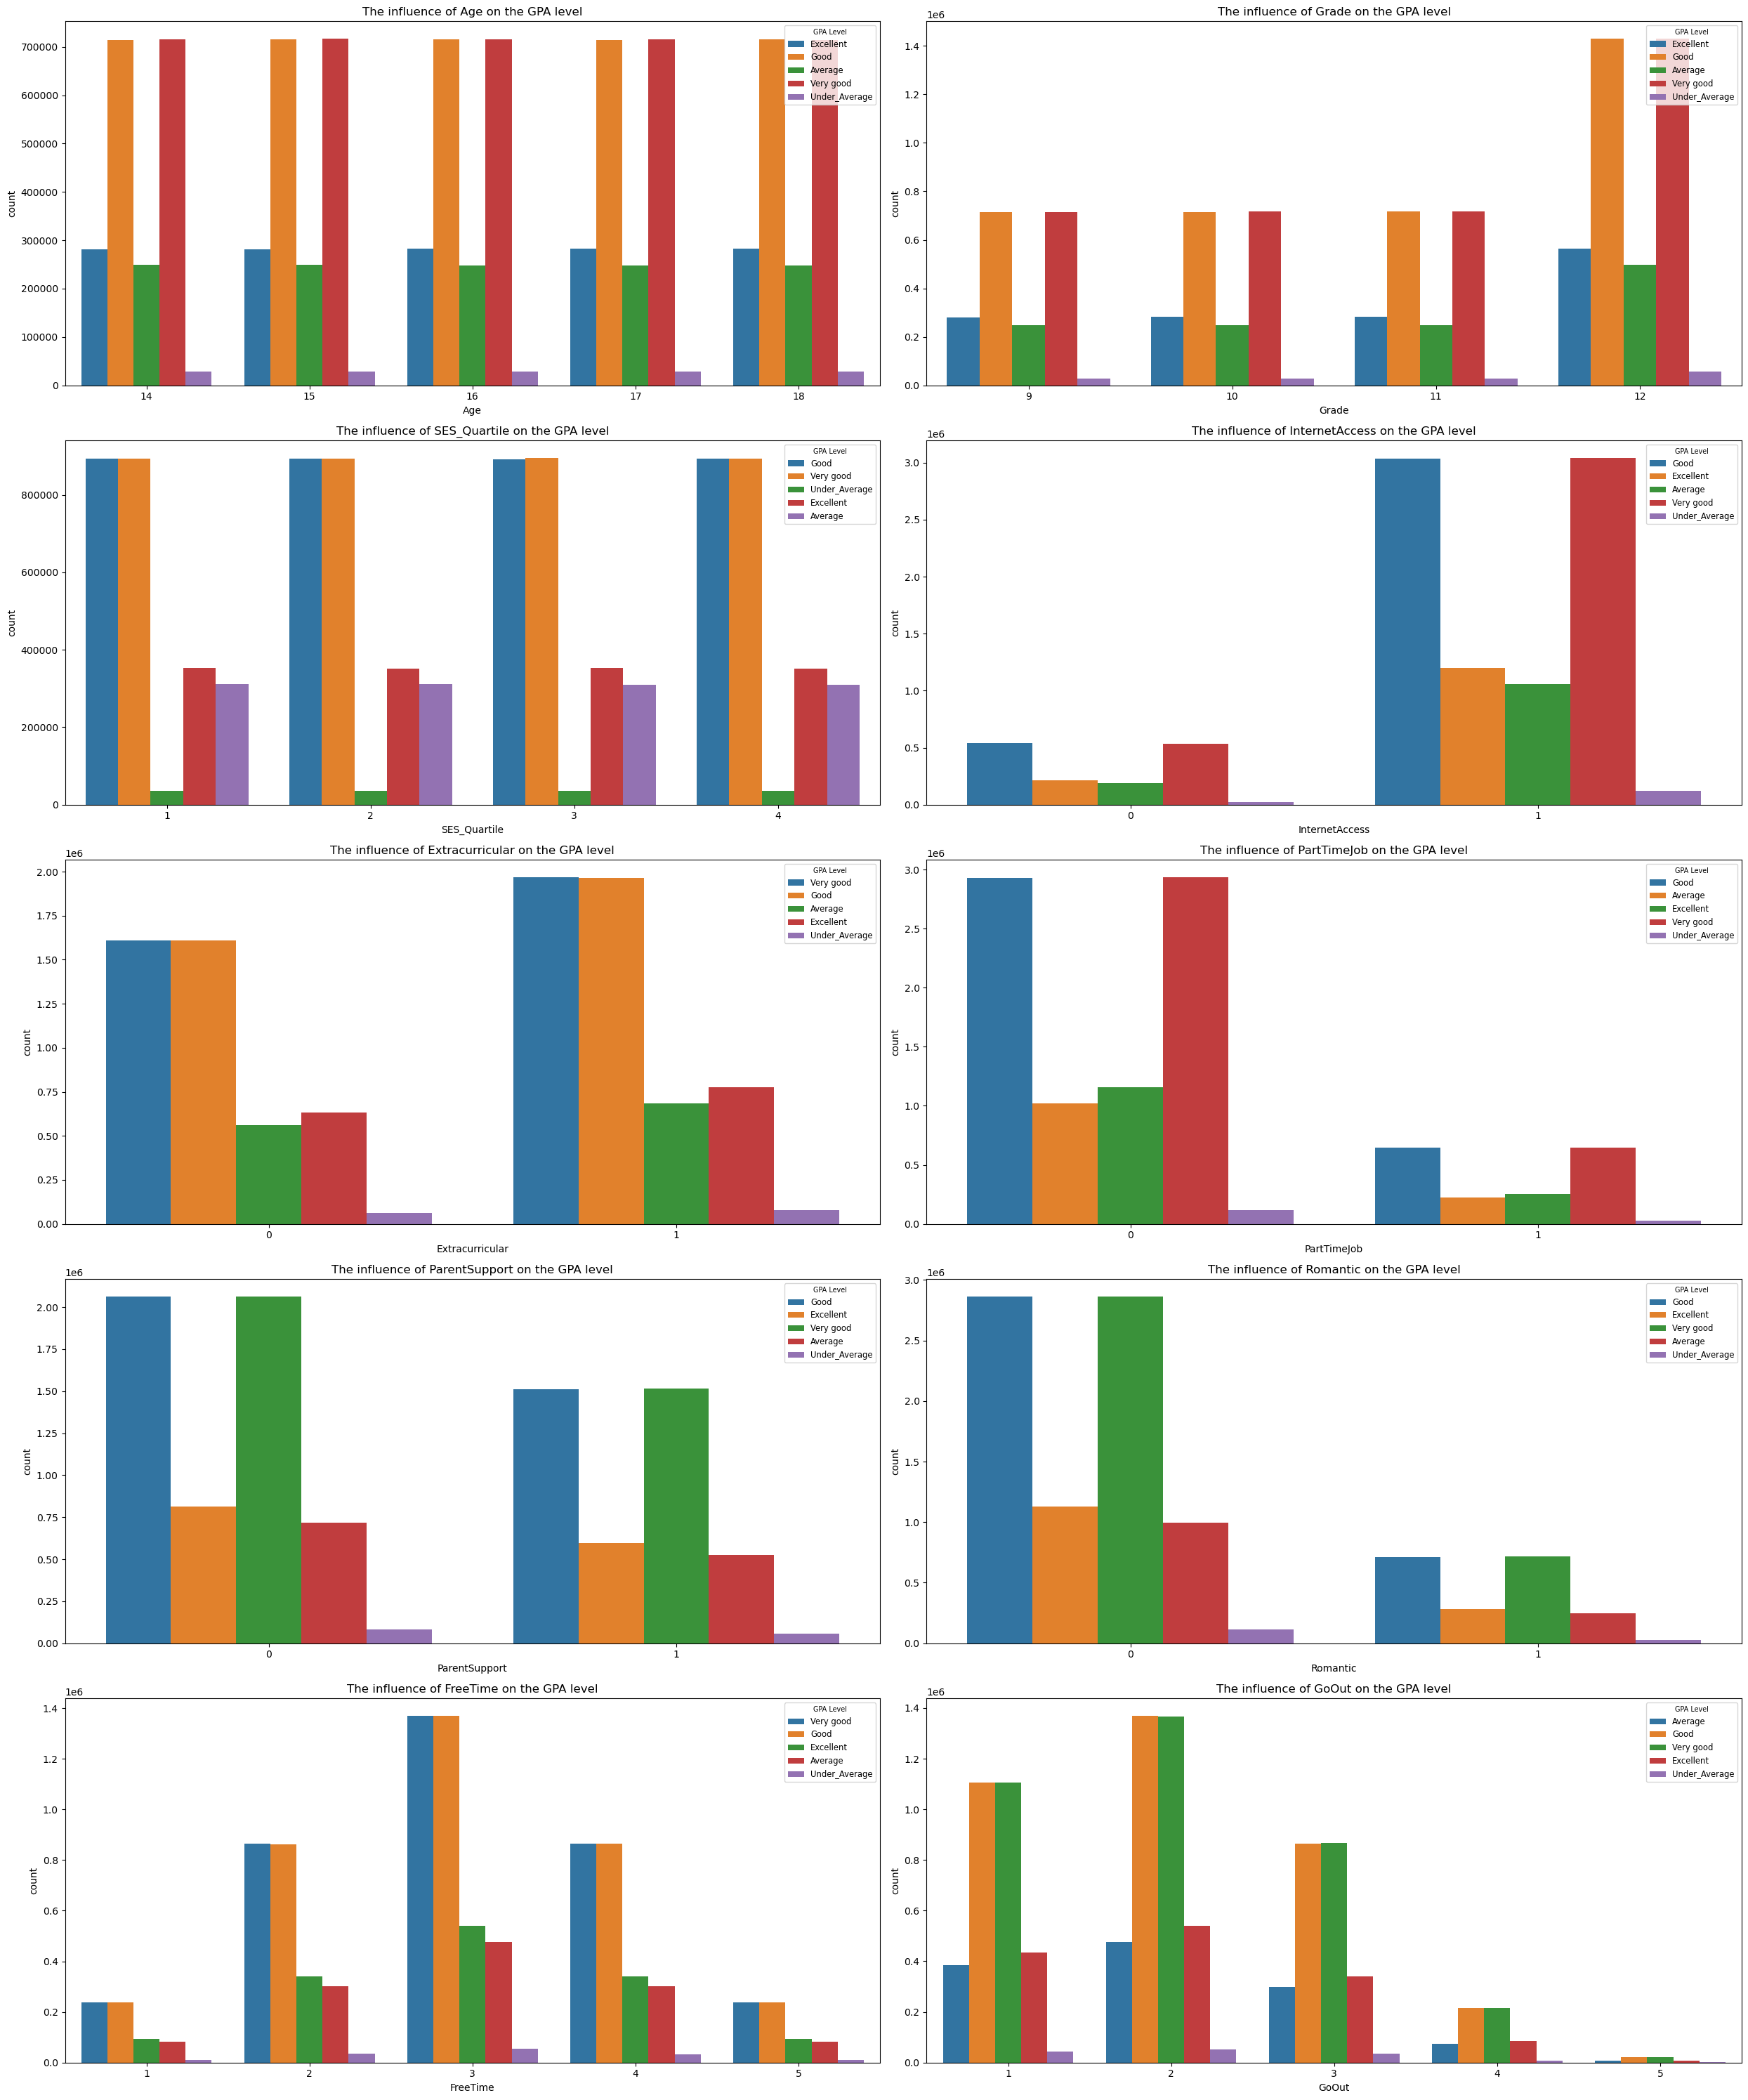

In [ ]:
# Visualization of Discrete Columns vs GPA Level as categorical 

plt.rcParams['figure.figsize'] = (25,30)

discret_col = ['Age', 'Grade', 'SES_Quartile', 'InternetAccess', 'Extracurricular', 'PartTimeJob', 'ParentSupport', 'Romantic', 'FreeTime', 'GoOut']

for i, col in enumerate(discret_col, 1):
    plt.subplot(5,2,i)
    sns.countplot(x=col, hue='GPA_cat', data = cleaned_data_copy, palette = "tab10")
    plt.legend(loc='upper right', title='GPA Level', fontsize='small', title_fontsize='x-small')
    plt.title(f'The influence of {col} on the GPA level')

plt.tight_layout()
plt.show()

### The visualizations suggest that students who have internet access, do not hold part-time jobs, are not in a romantic relationship, have up to three hours of free time, and dedicate around two hours to studying are more likely to achieve higher GPA

In [ ]:
# Plot continues numeric feature means against GPA 


for i, col in enumerate(num_col_cont, 1):
    # plt.subplot(3, 2, i)
    
    grouped_data = cleaned_data_copy.groupby('GPA')[col].mean().reset_index()
    
    fig = px.line(data_frame= grouped_data, x='GPA', y=col, width=1000, height=600)
    fig.update_layout(title={
        'text': f"The mean {col}  against GPA",
        'x': 0.5,  # Center horizontally
        'y': 0.95, # Near the top
        'xanchor': 'center',
        'yanchor': 'top'
    })
    fig.show()


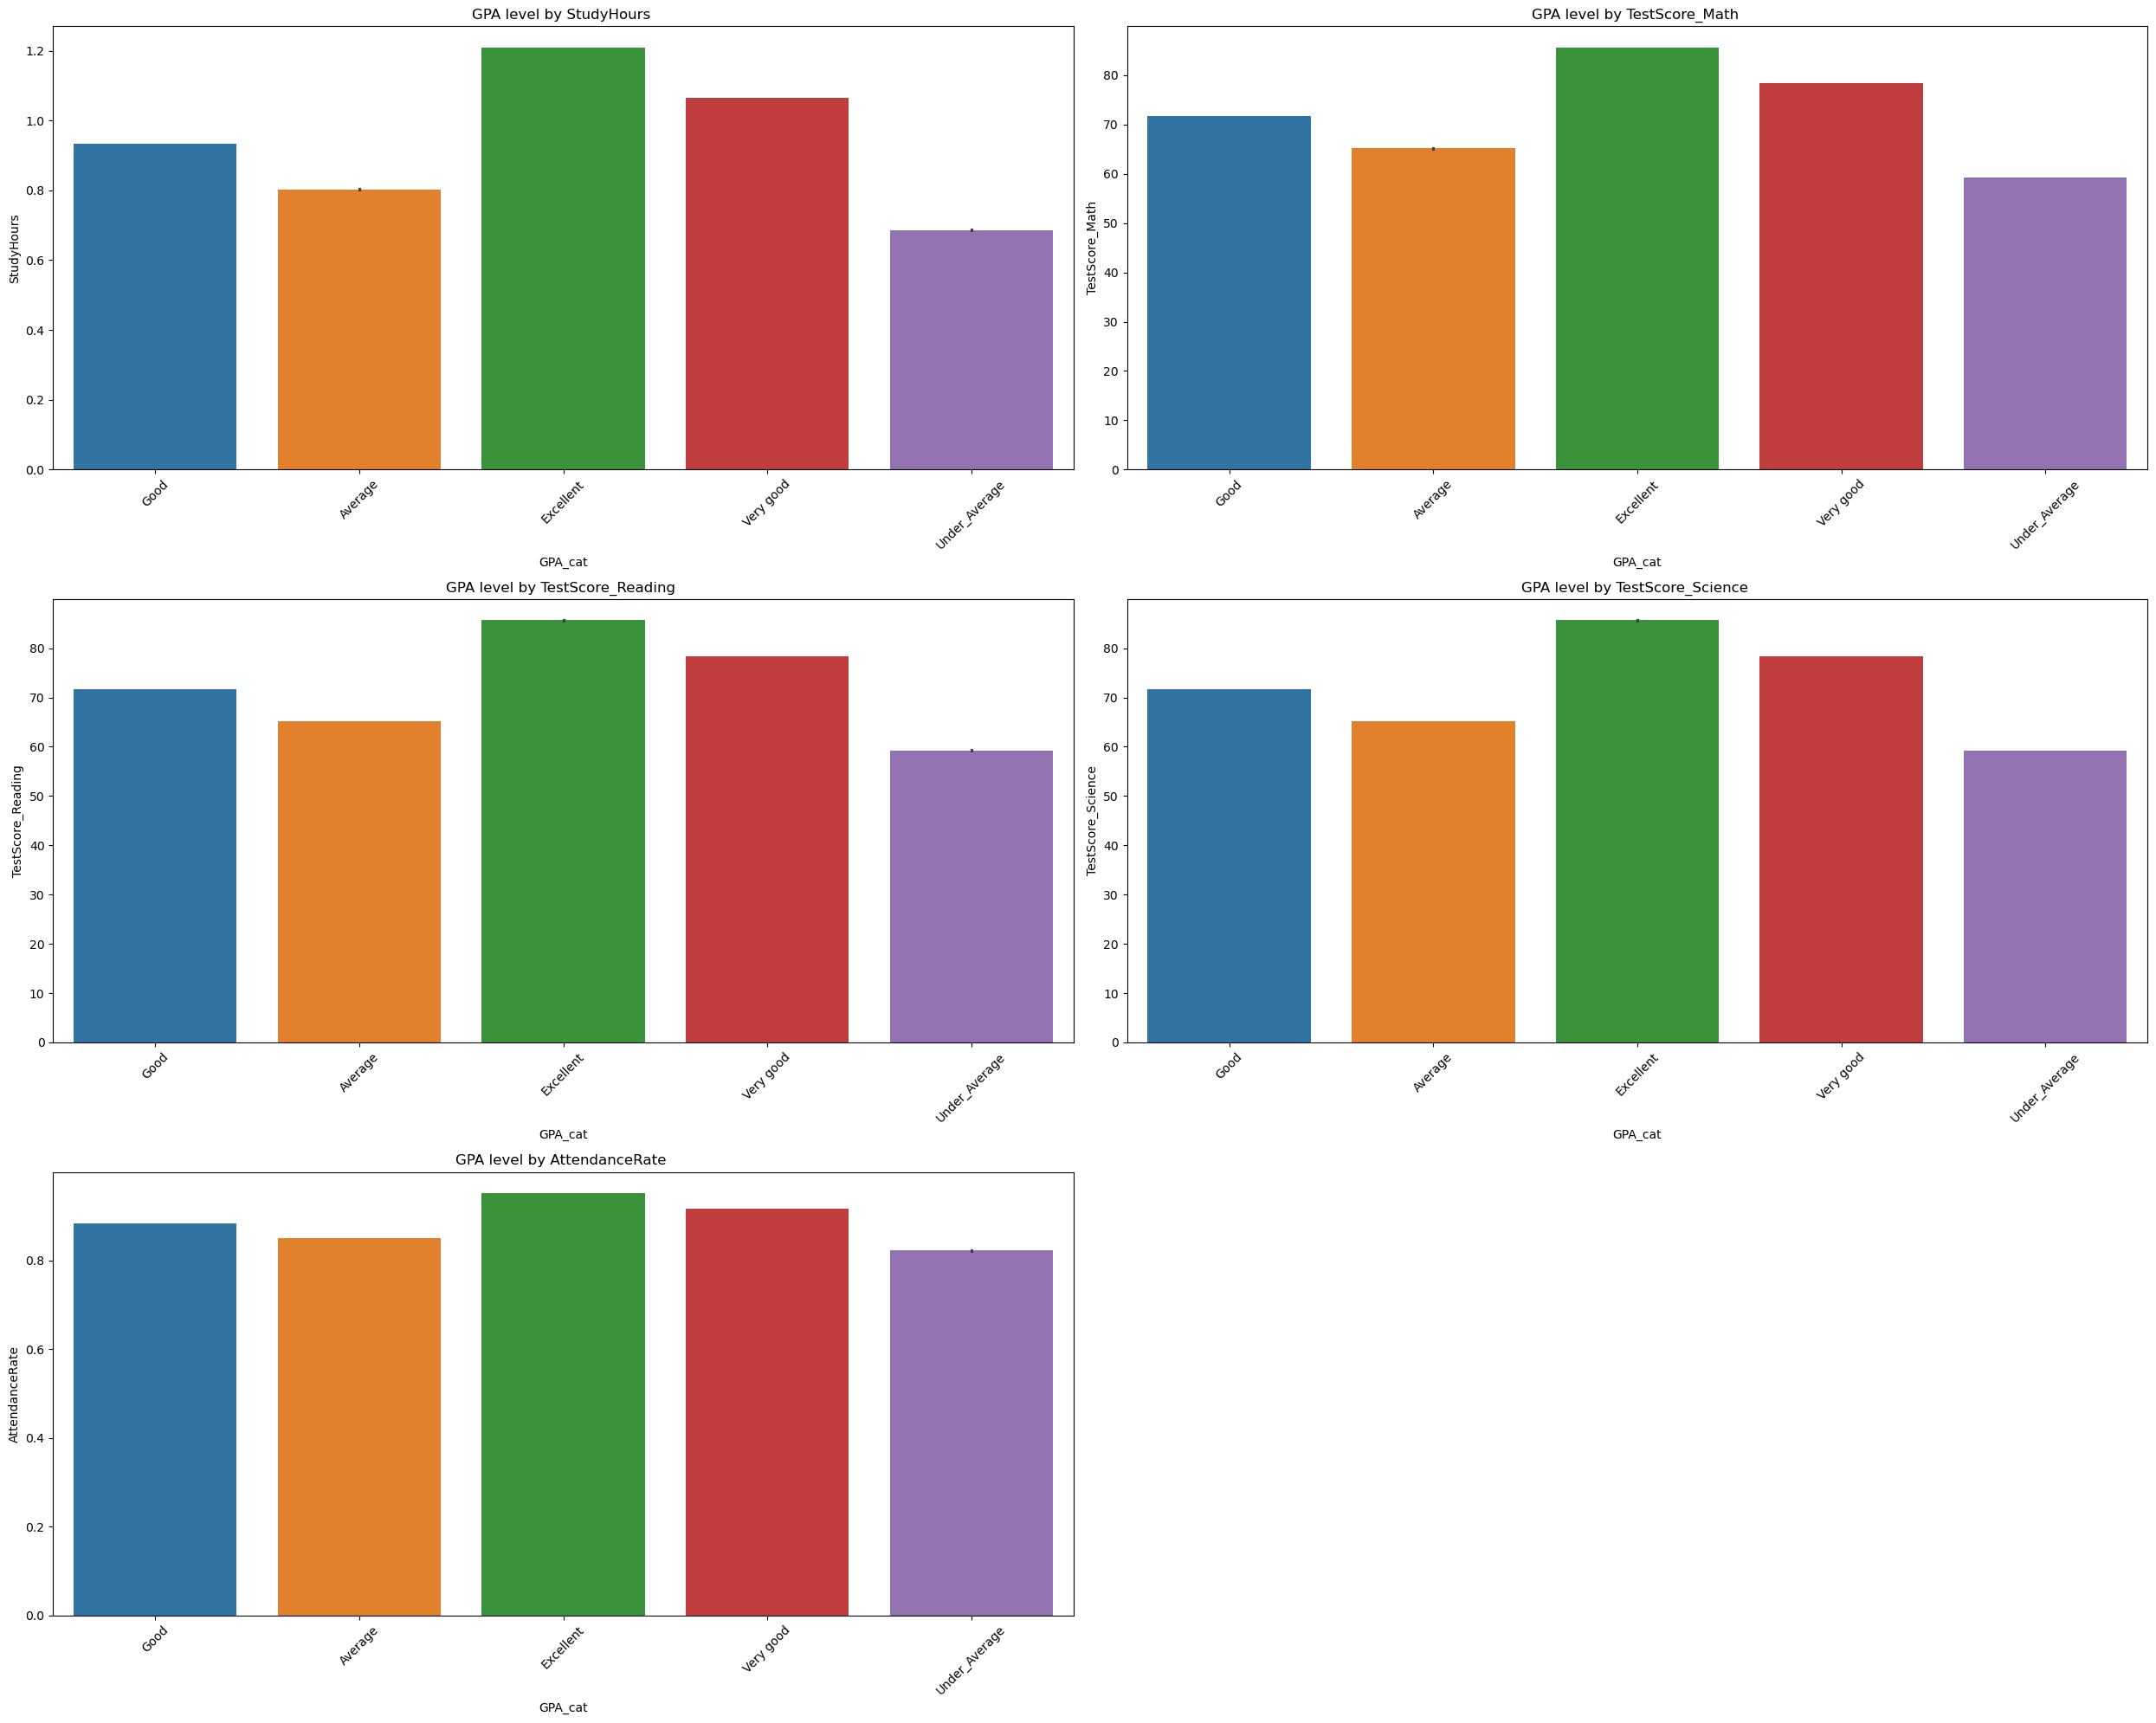

In [ ]:
# Visualizing the variation of GPA level by ('StudyHours', 'TestScore_Math', 'TestScore_Reading', 'TestScore_Science' and 'AttendanceRate')

key_col =['StudyHours', 'TestScore_Math', 'TestScore_Reading', 'TestScore_Science', 'AttendanceRate'] # Key columns 

plt.rcParams['figure.figsize'] = (25,20)

for i, col in enumerate(key_col, 1):
    plt.subplot(3,2,i)
    ax= sns.barplot(y=cleaned_data_copy[col], x= cleaned_data_copy['GPA_cat'],data=cleaned_data_copy, hue='GPA_cat')
    ax.tick_params(axis='x', rotation=45)
    plt.title(f"GPA level by {col} ")
plt.tight_layout()
plt.show()

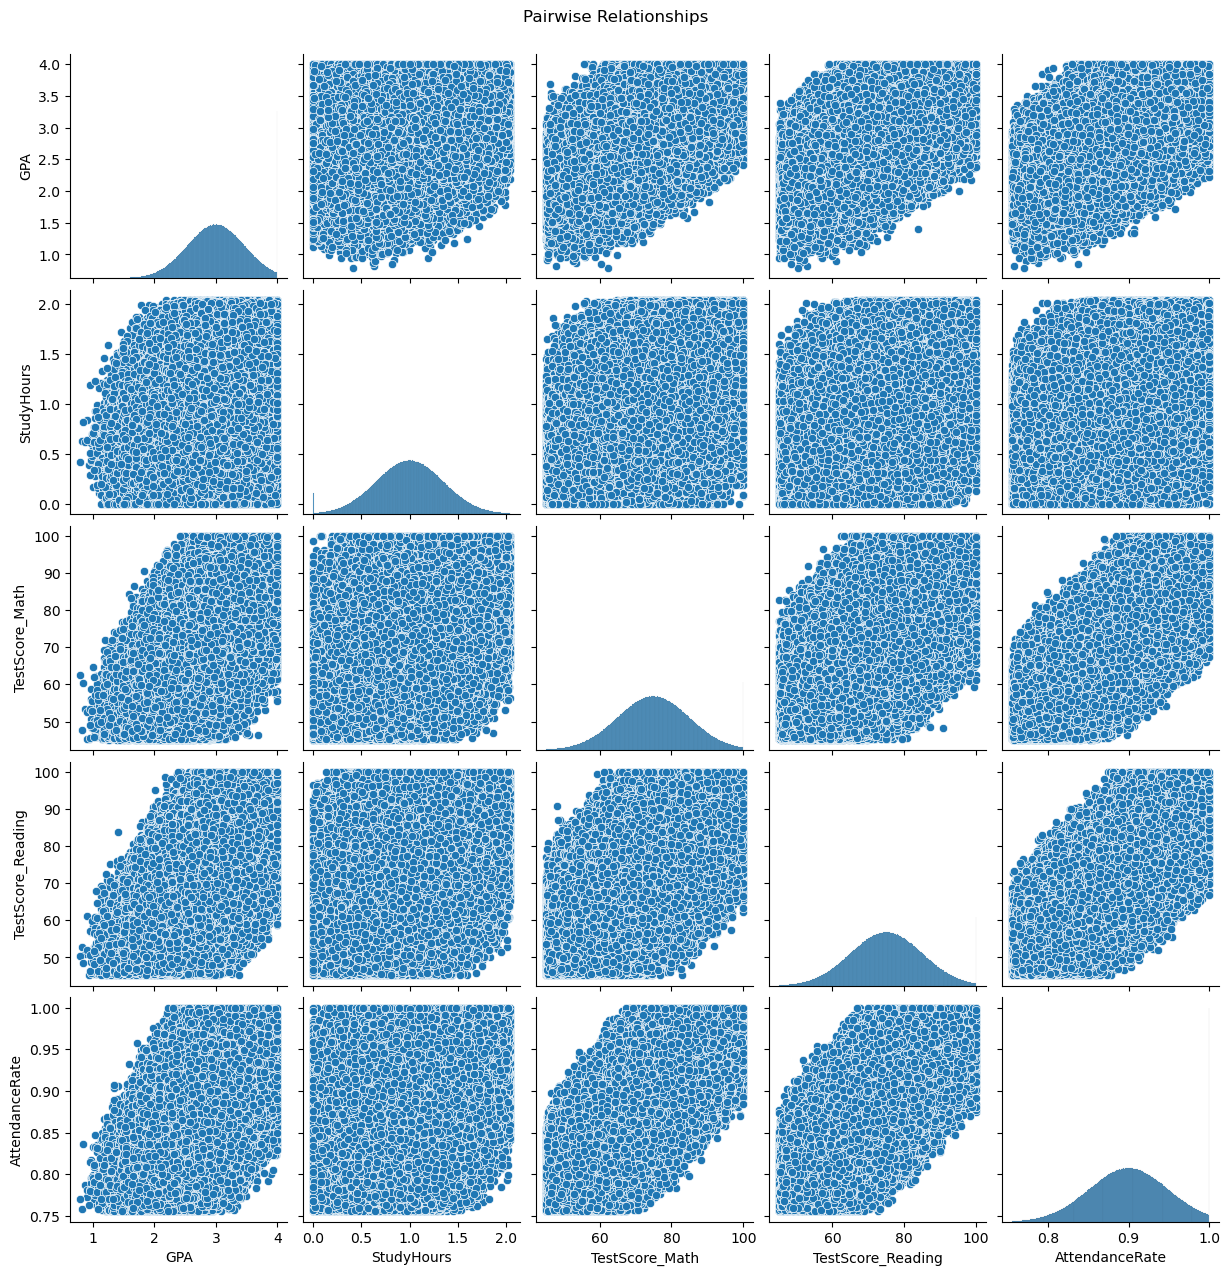

In [ ]:
#  Pairwise Relationship Between Key Features

plt.rcParams['figure.figsize'] = (20,15)
sns.pairplot(cleaned_data[['GPA', 'StudyHours', 'TestScore_Math', 'TestScore_Reading', 'AttendanceRate']])
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

### The exploratory data analysis (EDA) reveals a clear linear relationship between the GPA and several key features, including TestScore_Math, TestScore_Reading, TestScore_Science, and AttendanceRate. These variables show strong positive correlations with GPA, indicating that as students perform better in academic tests and maintain higher attendance rates, their GPA tends to increase accordingly. 
### Given the linear relationship between these characteristics, linear regression is an appropriate modeling choice for predicting the GPA.

In [56]:
# Encoding the categorical variables


binary_cols = ['Gender', 'SchoolType']
multi_cat_cols = ['Race', 'ParentalEducation', 'Locale']


# Label encoding 
for col in binary_cols:
    le = LabelEncoder()
    cleaned_data[col] = le.fit_transform(cleaned_data[col])


# One-hot encoding
data_encoded = pd.get_dummies(cleaned_data, columns=multi_cat_cols, drop_first=True, dtype=int)


C:\Users\Trois\AppData\Local\Temp\ipykernel_11916\2171107330.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = le.fit_transform(cleaned_data[col])
C:\Users\Trois\AppData\Local\Temp\ipykernel_11916\2171107330.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data[col] = le.fit_transform(cleaned_data[col])


In [57]:
# Separate the train data, test data and validation data that where concatenated in the beginning 

train_data_encoded = data_encoded.xs('train_data_key')

test_data_encoded = data_encoded.xs('test_data_key')

val_data_encoded = data_encoded.xs('val_data_key')


In [58]:
#  Separate inputs and targets
x_train = train_data_encoded.drop(columns='GPA')
y_train = train_data_encoded['GPA']

x_test = test_data_encoded.drop(columns='GPA')
y_test = test_data_encoded['GPA']

x_val = val_data_encoded.drop(columns='GPA')
y_val = val_data_encoded['GPA']

### **Linear Regression**

In [66]:
###################### Linear Regression #######################


from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [67]:
# Predict on training data
y_train_pred = lr_model.predict(x_train)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Print results
print("------ Training Evaluation (Linear Regression) ------")
print(f"MAE  : {mae_train:.3f}")
print(f"MSE  : {mse_train:.3f}")
print(f"RMSE : {rmse_train:.3f}")
print(f"R²   : {r2_train:.3f}")

------ Training Evaluation (Linear Regression) ------
MAE  : 0.237
MSE  : 0.088
RMSE : 0.296
R²   : 0.576


In [68]:
# Make prediction of linear regression model on test data

lr_predict = lr_model.predict(x_test)


# Evaluate the Ridge model

mae_lr = mean_absolute_error(y_test, lr_predict)
mse_lr = mean_squared_error(y_test, lr_predict)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, lr_predict)

print(f"-----------Results of Linear Regression -----------\n\n")
print(f"MAE : {mae_lr :.3f}")
print(f"MSE : {mse_lr :.3f}")
print(f"RMSE : {rmse_lr :.3f}")
print(f"Score R² : {r2_lr :.3f}")


-----------Results of Linear Regression -----------


MAE : 0.237
MSE : 0.088
RMSE : 0.297
Score R² : 0.575


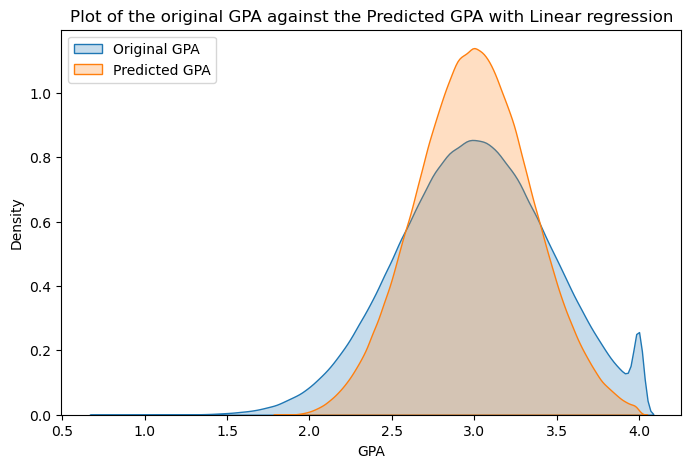

In [ ]:
# plot the original values vs the predicted one 
plt.rcParams['figure.figsize'] = (8,5)
sns.kdeplot(test_data['GPA'], label='Original GPA', fill=True)
sns.kdeplot(lr_predict, label='Predicted GPA', fill=True)
plt.title('Plot of the original GPA against the Predicted GPA with Linear regression')
plt.legend( loc='upper left')
plt.show()

### **The Linear Regression model does not have hyperparameters to tune. To enhance its performance, we will train the data using regularization techniques such as L1 (Lasso), L2 (Ridge), and ElasticNet**

### **Standardize the data before applying the regularization model Lasso l1, Ridge l2 et ElasticNet**

In [69]:
# Standardize the data before applying the regularization models Ridge and Lasso 

scaler = StandardScaler()

# Fit only on training data (to prevent data leakage)
scaler.fit(x_train)

# 3. Transform train, test, and validation sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

### **Lasso Regularization L1**

In [70]:
# Train the model
lasso_model = Lasso(alpha=0.0001)
lasso_model.fit(x_train_scaled, y_train)

,alpha,0.0001
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [71]:
# Make Prediction with Losso model on the test data

y_pred_lasso = lasso_model.predict(x_test_scaled)

# 3. évaluer le modèle lasso

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"----------- Results of Lasso regularization -----------\n\n")
print(f"MAE : {mae_lasso :.2f}")
print(f"MSE : {mse_lasso :.2f}")
print(f"RMSE : {rmse_lasso :.2f}")
print(f"Score R² : {r2_lasso :.2f}")

----------- Results of Lasso regularization -----------


MAE : 0.24
MSE : 0.09
RMSE : 0.30
Score R² : 0.58


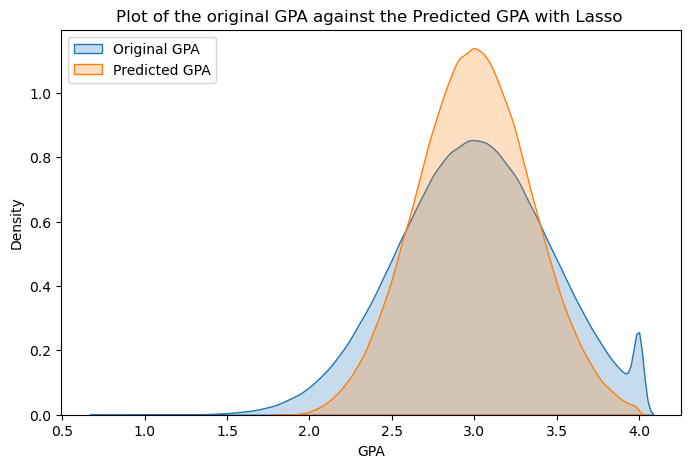

In [ ]:
# plot the original values vs the predicted one with Lasso regularization 

sns.kdeplot(test_data['GPA'], label='Original GPA', fill=True)
sns.kdeplot(y_pred_lasso, label='Predicted GPA', fill=True)
plt.title('Plot of the original GPA against the Predicted GPA with Lasso ')
plt.legend( loc='upper left')
plt.show()

### **Ridge Regularization L2**

In [72]:
# Train the Ridge model

ridge_model = Ridge(alpha=0.2)
ridge_model.fit(x_train_scaled, y_train)

,alpha,0.2
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [73]:
# Make Prediction with ridge model on the test data

y_pred_ridge = ridge_model.predict(x_test_scaled)

# Evaluate the Ridge model

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Results of Ridge regularization :")
print(f"MAE : {mae_ridge :.2f}")
print(f"MSE : {mse_ridge :.2f}")
print(f"RMSE : {rmse_ridge :.2f}")
print(f"Score R² : {r2_ridge :.2f}")

Results of Ridge regularization :
MAE : 0.24
MSE : 0.09
RMSE : 0.30
Score R² : 0.58


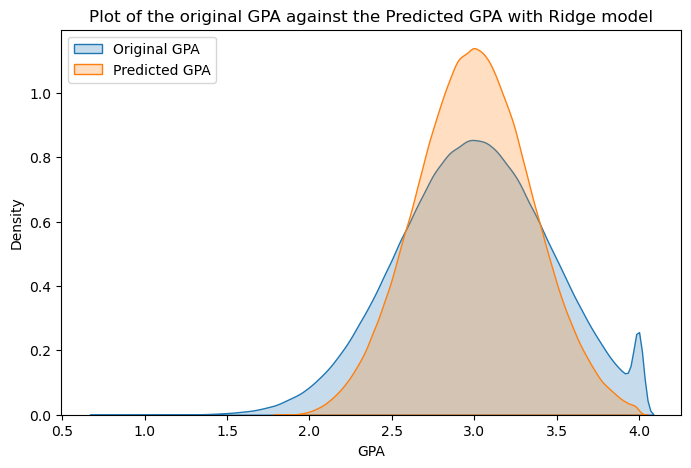

In [ ]:
# plot the original values vs the predicted one 

sns.kdeplot(test_data['GPA'], label='Original GPA', fill=True)
sns.kdeplot(y_pred_ridge, label='Predicted GPA', fill=True)
plt.title('Plot of the original GPA against the Predicted GPA with Ridge model')
plt.legend( loc='upper left')
plt.show()

### **ElasticNet Regression**

In [74]:
# Elasticnet model training 

ElastNet_model = ElasticNet(alpha=0.001, l1_ratio=0.4, random_state=42)


ElastNet_model.fit(x_train_scaled, y_train)

,alpha,0.001
,l1_ratio,0.4
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [75]:
# Make Prediction on the trained ElasticNet model 

y_pred_ridge_ElastNet = ElastNet_model.predict(x_test_scaled)

# Evaluate the ElasticNet model

mae_ElastNet = mean_absolute_error(y_test, y_pred_ridge_ElastNet)
mse_ElastNet = mean_squared_error(y_test, y_pred_ridge_ElastNet)
rmse_ElastNet = np.sqrt(mse_ElastNet)
r2_ElastNet = r2_score(y_test, y_pred_ridge_ElastNet)

print(f"Results of ElasticNet regularization :")
print(f"MAE : {mae_ElastNet :.2f}")
print(f"MSE : {mse_ElastNet :.2f}")
print(f"RMSE : {rmse_ElastNet :.2f}")
print(f"Score R² : {r2_ElastNet :.2f}")

Results of ElasticNet regularization :
MAE : 0.24
MSE : 0.09
RMSE : 0.30
Score R² : 0.58


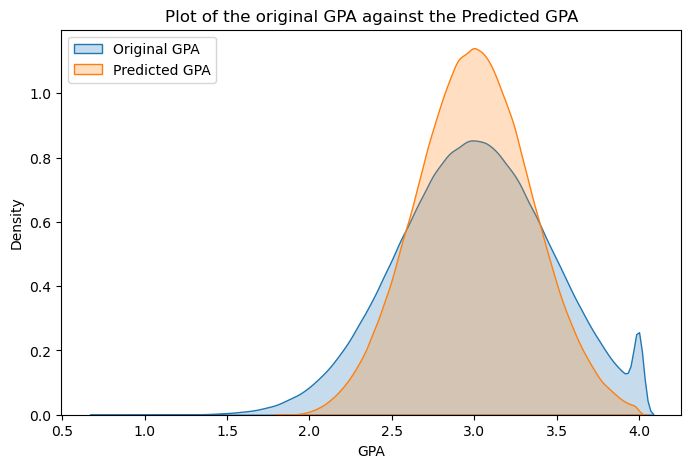

In [ ]:
# plot the original values vs the predicted one 

sns.kdeplot(test_data['GPA'], label='Original GPA', fill=True)
sns.kdeplot(y_pred_ridge_ElastNet, label='Predicted GPA', fill=True)
plt.title('Plot of the original GPA against the Predicted GPA')
plt.legend( loc='upper left')
plt.show()

### **Among the three models evaluated, Linear Regression outperformed Ridge, Lasso and elasticnet regularization techniques, achieving the lowest MAE of 0.237 , indicating that it captured the variance in GPA most effectively. This proof that the data has a strong linear structure with limited need for regularization. Therefore, Linear Regression is the most suitable model for GPA prediction in this context**

### **The following model was implemented to capture complex, non-linear interactions between features that may not have been captured by the linear regression models**

### **Decision Tree Regressor**

In [82]:
###################### Decision Tree Regressor #######################

from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor(max_depth=5)

dtr_model.fit(x_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [83]:

dtr_predict = dtr_model.predict(x_test)

# Evaluate the Model
mae_dtr = mean_absolute_error(y_test, dtr_predict)
mse_dtr = mean_squared_error(y_test, dtr_predict)
rmse_dtr = np.sqrt(mse_dtr)
r2_dtr = r2_score(y_test, dtr_predict)

# Print Results
print(f"Decision Tree Regressor Results:")
print(f"MAE: {mae_dtr:.2f}")
print(f"MSE: {mse_dtr:.2f}")
print(f"RMSE: {rmse_dtr:.2f}")
print(f"R² Score: {r2_dtr:.2f}")

Decision Tree Regressor Results:
MAE: 0.25
MSE: 0.10
RMSE: 0.31
R² Score: 0.54


### **Deep Learning**

In [ ]:
# Deep learning model construction 


model = Sequential()


model.add(Dense(256,input_dim=28 ,activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.3))

model.add(Dense(1, activation='linear'))  # Output layer


scaler_dl = StandardScaler()

scaler_dl.fit(x_train)

x_train_scaled_dl = scaler_dl.transform(x_train)
x_test_scaled_dl = scaler_dl.transform(x_test)
x_val_scaled_dl = scaler_dl.transform(x_val)

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

c:\Users\Trois\Downloads\Video\Data Science\Month 5\Data_Science\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Training the model 


early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train_scaled_dl, y_train,
                    validation_data=(x_val_scaled_dl, y_val),
                    epochs=10,
                    batch_size=3072,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 117s 44ms/step - loss: 1.5854 - mae: 0.8211 - val_loss: 0.0885 - val_mae: 0.2382
Epoch 2/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 113s 43ms/step - loss: 0.1305 - mae: 0.2886 - val_loss: 0.0881 - val_mae: 0.2375
Epoch 3/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 115s 44ms/step - loss: 0.1114 - mae: 0.2668 - val_loss: 0.0883 - val_mae: 0.2380
Epoch 4/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 114s 44ms/step - loss: 0.0981 - mae: 0.2505 - val_loss: 0.0879 - val_mae: 0.2372
Epoch 5/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 114s 44ms/step - loss: 0.0921 - mae: 0.2428 - val_loss: 0.0880 - val_mae: 0.2371
Epoch 6/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 115s 44ms/step - loss: 0.0899 - mae: 0.2400 - val_loss: 0.0879 - val_mae: 0.2372
Epoch 7/10
2590/2590 ━━━━━━━━━━━━━━━━━━━━ 114s 44ms/step - loss: 0.0892 - mae: 0.2391 - val_loss: 0.0880 - val_mae: 0.2374


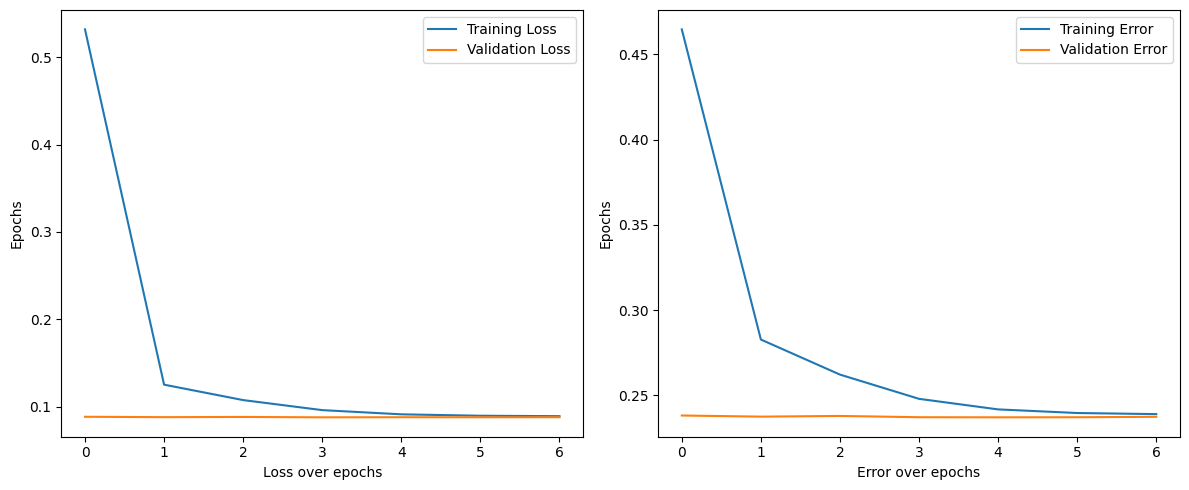

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label= 'Training Loss')
plt.plot(history.history['val_loss'], label= 'Validation Loss')
plt.xlabel('Loss over epochs')
plt.ylabel('Epochs')
plt.tight_layout()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label= 'Training Error')
plt.plot(history.history['val_mae'], label= 'Validation Error')
plt.xlabel('Error over epochs')
plt.ylabel('Epochs')
plt.tight_layout()
plt.legend()

In [ ]:
# Evaluate the model on test data 

loss, mae = model.evaluate(x_test_scaled_dl, y_test)
print(f'Loss test : {loss}')
print(f'Test error : {mae}')

31075/31075 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - loss: 0.0892 - mae: 0.2394
Loss test : 0.08924296498298645
Test error : 0.2393903285264969


In [64]:
# Save the linear regression model in order to use it on the streamlit app

import joblib


# Save the model 
joblib.dump(lr_model, 'lr_model.pkl')

data_features = list(data_encoded.columns)
data_features.remove('GPA')

#Save the features
joblib.dump(data_features, 'data_features.pkl')




['data_features.pkl']